In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm
from tqdm import tqdm

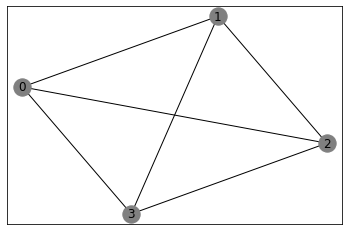

In [2]:
#początkowa sieć
g = nx.Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,3)

pos=nx.spring_layout(g)
nx.draw_networkx(g,with_labels=True,node_color='gray',pos=pos, width=1)

In [3]:
my_edges = []
my_edges.append([0,1])
my_edges.append([0,2])
my_edges.append([0,3])
my_edges.append([1,2])
my_edges.append([1,3])
my_edges.append([2,3])

m=2
N=1000000
node_number = 4

degree_hist = dict()
degree_hist[0]=3
degree_hist[1]=3
degree_hist[2]=3
degree_hist[3]=3

for i in tqdm(range(N)):
    new=np.random.randint(low=0,high=len(my_edges))
    edge = my_edges[new]
    degree_hist[edge[0]]+=1
    degree_hist[edge[1]]+=1
    degree_hist[node_number]=2
    #m=2 węzeł ma tworzyć 2m połączeń do starych węzłów
    if m==2:
        wrong = True
        while wrong:
            new2=np.random.randint(low=0,high=len(my_edges))
            edge2 = my_edges[new2]
            #zakładam, że nie można 2x połączyć się z tym samym węzłem
            #gdybym zezwalała na to, warunek zmienia się na new2!=new1 lub edge2!=edge
            if edge2[0]!=edge[0] and edge2[1]!=edge[0] and edge2[0]!=edge[1] and edge2[1]!=edge[1]:
                wrong = False
        
        degree_hist[edge2[0]]+=1
        degree_hist[edge2[1]]+=1
        degree_hist[node_number]+=2
        my_edges.append([node_number,edge2[0]])
        my_edges.append([node_number,edge2[1]])
            
    my_edges.append([node_number,edge[0]])
    my_edges.append([node_number,edge[1]])
    
    node_number+=1
#print(degree_hist)
#print(my_edges)

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:12<00:00, 77015.43it/s]


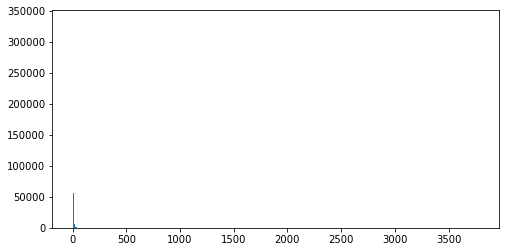

In [4]:
hello=list(degree_hist.values())
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
counts, edges, bars = plt.hist(hello, bins=list(np.linspace(0.5,max(hello)+0.5,max(hello)+1)))

In [5]:
counts=list(counts)
xs=[]
ys=[]
for i in range(len(counts)):
    if counts[i]!=0:
        xs.append(i)
        ys.append(counts[i])

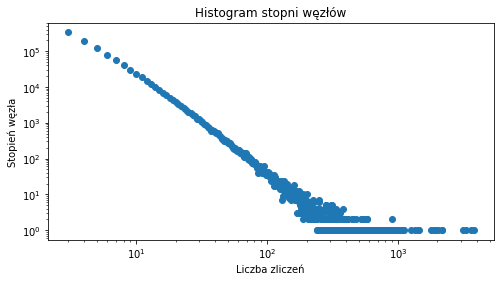

In [6]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xs,ys)
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Histogram stopni węzłów")
plt.xlabel('Liczba zliczeń')
plt.ylabel('Stopień węzła')
plt.rcParams['savefig.facecolor']='white'

[5.0, 7.5, 11.25, 16.875, 25.3125, 37.96875, 56.953125, 85.4296875, 128.14453125, 192.216796875, 288.3251953125, 432.48779296875, 648.731689453125, 973.0975341796875, 1459.6463012695312, 2189.469451904297, 3284.2041778564453] [523698, 254159, 126672, 52040, 23265, 10944, 5044, 2318, 1012, 475, 214, 90, 37, 22, 4, 6, 4]


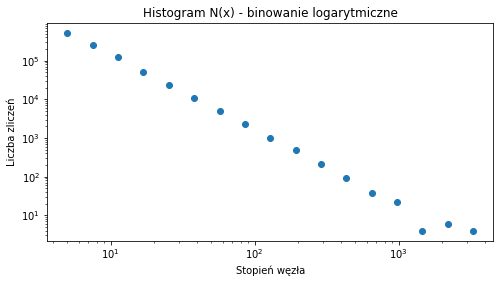

In [7]:
#binowanie logarytmiczne
a=1.5
x0=min(hello)
x_max=max(hello)
bins=[]
current_bin=[x0,x0*a]
bins.append(current_bin)
while current_bin[1]<=x_max:
    x0=current_bin[1]
    current_bin=[x0,x0*a]
    bins.append(current_bin)

yl=[]
xl=[]
for bi in bins:
    mid=bi[0]+(bi[1]-bi[0])/2
    suma=0
    for p in hello:
        if p>=bi[0] and p<bi[1]:
            suma+=1
    if suma>0:
        xl.append(mid)
        yl.append(suma)
print(xl,yl)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xl,yl)
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Histogram N(x) - binowanie logarytmiczne")
plt.xlabel('Stopień węzła')
plt.ylabel('Liczba zliczeń')
plt.rcParams['savefig.facecolor']='white'


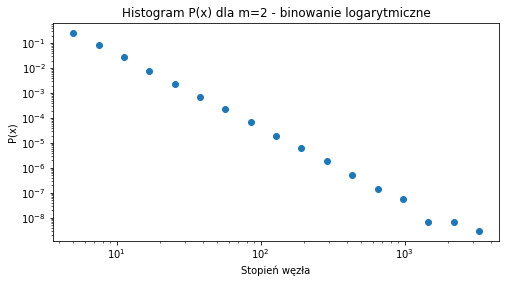

In [8]:
yPl=[]
xPl=[]
for bi in bins:
    mid=bi[0]+(bi[1]-bi[0])/2
    suma=0
    for p in hello:
        if p>=bi[0] and p<bi[1]:
            suma+=1
    xPl.append(mid)
    yPl.append(suma)
#print(xPl,yPl)
N=sum(yPl)
#print(N)
prob_yl=[]
prob_xl=[]
for i in range(len(bins)):
    width=bins[i][1]-bins[i][0]
    prob=yPl[i]/(N*width)
    if prob>0:
        prob_yl.append(prob)
        prob_xl.append(xPl[i])
#print(prob_yl)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(prob_xl,prob_yl)
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Histogram P(x) dla m=2 - binowanie logarytmiczne")
plt.ylabel('P(x)')
plt.xlabel('Stopień węzła')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("prawd_m2.png")